In [38]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

import pandas as pd

In [39]:
df=pd.read_csv("loan_sanction_test.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [40]:
df.fillna(df.mode().iloc[0], inplace=True)

In [41]:
df = pd.get_dummies(df, drop_first=True)

In [42]:

X = df.drop('LoanAmount', axis=1) 
y = df['LoanAmount']

In [43]:
df = pd.get_dummies(df, drop_first=True)

In [44]:
# x=df.drop(['Loan_ID'],axis=1)
# y=df['Loan_ID']

In [45]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [46]:
rfc=RandomForestRegressor()

In [47]:
rfc.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [48]:
rfc.score(x_train,y_train)

0.8939598989804263

In [49]:
rfc.score(x_test,y_test)

0.1785281678536228

In [50]:
print(rfc.predict(x_test))

[144.62 137.66 142.35 140.42 124.03 140.74 153.37 116.04 115.46 207.85
 165.3  140.35 207.11 155.88 148.91 105.86 236.91  91.86 160.08 127.28
  97.32 142.55 162.06 141.15 183.17 139.68 162.29 147.85 130.   125.27
 123.4  129.25 123.59 122.04  69.13 116.81 184.22 135.63 139.07 119.46
 123.43  90.66 112.14 190.14 142.78 127.59 130.62 207.42 156.27 143.56
 108.12 124.48  75.61 118.56 153.76 121.99 154.02 185.7  117.49 174.88
 110.19 100.15  87.15 168.63 131.55 114.2  248.48 116.73 131.38 102.42
 104.34 137.54  96.3  140.8 ]


In [51]:
y_test

324     90.0
52     160.0
265    138.0
109    165.0
148    139.0
       ...  
294    128.0
17     126.0
291    145.0
102    116.0
113    122.0
Name: LoanAmount, Length: 74, dtype: float64

In [52]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=300,centers=4,random_state=0,cluster_std=0.60)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
km=KMeans(n_clusters=4,random_state=0)


In [53]:
km.fit(x_train,y_train)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [54]:
pred=km.predict(x_test)

In [55]:
pred

array([3, 3, 2, 0, 3, 3, 2, 3, 2, 2, 1, 0, 2, 1, 1, 1, 2, 1, 3, 0, 0, 3,
       0, 2, 0, 1, 3, 0, 3, 0, 3, 3, 3, 3, 2, 1, 2, 1, 2, 1, 0, 0, 3, 1,
       0, 0, 0, 3, 0, 2, 1, 3, 1, 1, 1, 1, 2, 3, 1, 0], dtype=int32)

In [56]:
y_test

array([2, 2, 3, 0, 2, 2, 3, 2, 3, 3, 1, 0, 3, 1, 1, 1, 3, 1, 2, 0, 0, 2,
       0, 3, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 3, 1, 3, 1, 3, 1, 0, 0, 2, 1,
       0, 0, 0, 2, 0, 3, 1, 2, 1, 1, 1, 1, 3, 2, 1, 0])

In [58]:
km

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [59]:
km.cluster_centers_

array([[ 0.94258267,  4.44759509],
       [ 1.95043593,  0.86471283],
       [-1.40480371,  7.80607325],
       [-1.60591495,  2.86221292]])

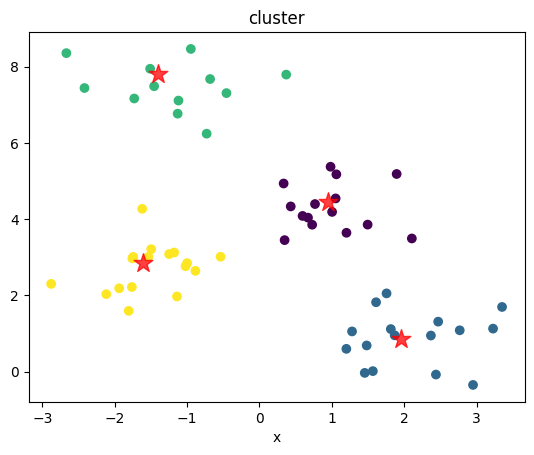

In [62]:
import matplotlib.pyplot as plt
plt.scatter(x_test[:,0],x_test[:,1],c=pred,cmap="viridis")
center=km.cluster_centers_ #object
plt.scatter(center[:,0],center[:,1],s=200,c='red',alpha=0.75,marker="*")
plt.title("cluster")
plt.xlabel("x")
plt.show()

In [63]:
##dbsacn
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
x,y=make_blobs(n_samples=300,centers=4,random_state=0,cluster_std=0.60)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
db=DBSCAN(eps=0.3,min_samples=5)
db.fit(x_train,y_train)


,eps,0.3
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [68]:
pred=db.fit_predict(x_test)

In [66]:
y_test

array([3, 0, 0, 2, 2, 2, 3, 0, 1, 3, 2, 1, 1, 1, 1, 1, 1, 3, 2, 0, 0, 0,
       3, 1, 2, 2, 3, 2, 2, 0, 3, 1, 3, 0, 2, 3, 3, 2, 0, 1, 0, 0, 0, 1,
       2, 3, 0, 0, 1, 0, 3, 0, 2, 3, 2, 3, 1, 1, 0, 2])

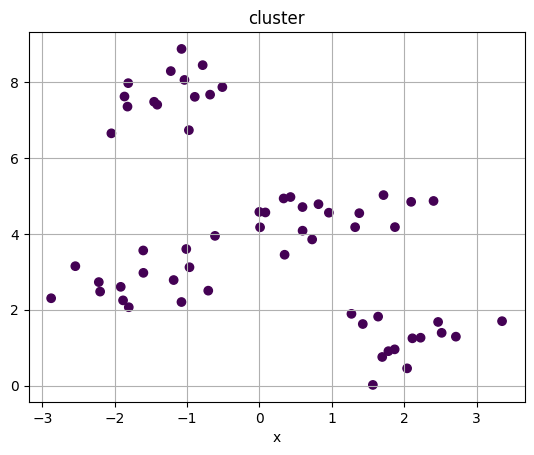

In [69]:
import matplotlib.pyplot as plt
plt.scatter(x_test[:,0],x_test[:,1],c=pred,cmap="viridis")
# center=km.cluster_centers_ #object
#plt.scatter(center[:,0],center[:,1],s=200,c='red',alpha=0.75,marker="*")
plt.title("cluster")
plt.xlabel("x")
plt.grid()
plt.show()